In [1]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
from torch.autograd import Variable
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, TensorDataset
import matplotlib.pyplot as plt
from PIL import Image
import os

In [2]:
# path = "D:\Python training\Pong course & sklearn\suv-folder\data"
# all = os.listdir(path)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
PIL_images = []
ylabel_list = []
# 讀取資料 & 創建 label-list
for i in range(1, 550):
  try:
    img = Image.open("./drive/MyDrive/data/suv%i.png"%(i)).convert("RGB")
    PIL_images.append(img)
    ylabel_list.append("suv")
  except:
    pass
for i in range(1, 800):
  try:
    img = Image.open("./drive/MyDrive/data/sedan%i.png"%(i)).convert("RGB")
    PIL_images.append(img)
    ylabel_list.append("sedan")
  except:
    pass

In [5]:
# 練習自己寫, 亂數訓練資料順序, 劃分資料集
def split_train_validation():
    import numpy as np
    a = np.arange(0, 4000, 2)
    a = a.reshape(1000, 2)
    np.random.shuffle(a) # 陣列洗牌(預設會打亂第一維): np.random.shuffle(資料順序洗牌) & np.random.permutation(索引順序洗牌)
    batch_size = 10 # 超參數: batch_size
    train_indices = []
    for i in range(len(a)):
        if i % int(len(a)/batch_size) != 0:
            train_indices.append(i)
    validation_indices = []
    for i in range(len(a)):
        if i % int(len(a)/batch_size) == 0:
            validation_indices.append(i)
    train_indices = np.array(train_indices)
    train_data = a[train_indices]
    validation_indices = np.array(validation_indices)
    validation_data = a[validation_indices]

    print("1.1 這次 epoch, 訓練資料 size: ", train_data.shape)
    print("1.2 這次 epoch, 訓練資料 size: ", train_data[2])
    print("2.1 這次 epoch, 驗證資料 size: ", validation_data.shape)
    print("2.2 這次 epoch, 驗證資料 size: ", validation_data[2])
    return None
# split_train_validation() # 練習成功！

In [6]:
# 檢查資料長度
print(len(PIL_images))
print(len(ylabel_list))

1073
1073


In [7]:
# 將PIL影像轉成 torch_tensor
loader = torchvision.transforms.Compose([
                                         
      transforms.ToTensor(),
])
unloader = torchvision.transforms.ToPILImage()
imgs_list = [loader(img) for img in PIL_images]

In [8]:
# 借用 sklearn 打亂讀取進來的訓練資料的順序(permutation)
print(imgs_list[100], "\n", ylabel_list[100]) # 打亂前
from sklearn import utils
imgs_list, ylabel_list = utils.shuffle(imgs_list, ylabel_list)
print("==="*30)
print(imgs_list[100], "\n", ylabel_list[100]) # 打亂前

tensor([[[0.9882, 1.0000, 0.9882,  ..., 0.9961, 0.9961, 1.0000],
         [0.8863, 0.8549, 0.8745,  ..., 0.9333, 0.9294, 0.9529],
         [0.6627, 0.6588, 0.6510,  ..., 0.8667, 0.8627, 0.8706],
         ...,
         [0.6980, 0.7020, 0.7216,  ..., 0.6941, 0.7059, 0.6941],
         [0.7137, 0.7098, 0.7176,  ..., 0.6039, 0.7098, 0.6980],
         [0.7176, 0.7098, 0.7098,  ..., 0.5529, 0.6902, 0.7098]],

        [[0.9961, 1.0000, 0.9961,  ..., 0.9961, 0.9961, 1.0000],
         [0.8941, 0.8627, 0.8824,  ..., 0.9333, 0.9294, 0.9529],
         [0.6706, 0.6667, 0.6549,  ..., 0.8667, 0.8627, 0.8706],
         ...,
         [0.7020, 0.7059, 0.7255,  ..., 0.6980, 0.7098, 0.6980],
         [0.7176, 0.7137, 0.7216,  ..., 0.6078, 0.7137, 0.7020],
         [0.7216, 0.7137, 0.7137,  ..., 0.5569, 0.6941, 0.7137]],

        [[0.9922, 0.9961, 0.9843,  ..., 1.0000, 1.0000, 1.0000],
         [0.8902, 0.8588, 0.8784,  ..., 0.9373, 0.9373, 0.9608],
         [0.6667, 0.6627, 0.6549,  ..., 0.8745, 0.8706, 0.

In [9]:
# 檢查資料維度
print(imgs_list[1000][np.newaxis].shape)
print(len(imgs_list))

torch.Size([1, 3, 200, 200])
1073


In [10]:
# 將list串成數筆索引的各筆資料, stack成一個訓練張量(train_tensor)
train_tensor = imgs_list[0].unsqueeze(dim=0)
for i in range(len(imgs_list)-1):
  train_tensor = np.vstack((train_tensor, imgs_list[i+1].unsqueeze(dim=0)))
del imgs_list

In [11]:
# 檢查訓練張量型態
train_tensor = torch.FloatTensor(train_tensor)
print(type(train_tensor))
print(train_tensor.shape)

<class 'torch.Tensor'>
torch.Size([1073, 3, 200, 200])


In [12]:
# 檢查訓練張量長度
train_tensor.size(0)

1073

In [13]:
# train_label = train_tensor

from sklearn import preprocessing # 預處理, label-encording
  # 2. Classification-label, label=ylabel
en = preprocessing.LabelEncoder()
ylabel_arr = en.fit_transform(ylabel_list)
train_label = torch.from_numpy(ylabel_arr)

print(train_label.size(), "\n", train_label.dtype)
del ylabel_list, ylabel_arr

torch.Size([1073]) 
 torch.int64


In [14]:
train_label[400:700]

tensor([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,

tensor([[[0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9843],
         [0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9843],
         [0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9843],
         ...,
         [0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9843],
         [0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9843],
         [0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9843]],

        [[0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9843],
         [0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9843],
         [0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9843],
         ...,
         [0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9843],
         [0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9843],
         [0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9843]],

        [[0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9843],
         [0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9843],
         [0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.

([], <a list of 0 Text major ticklabel objects>)

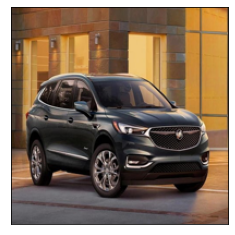

In [15]:
print(train_tensor[1])
plt.imshow(unloader(train_tensor[200])) # 轉回圖片看資料
plt.xticks([])
plt.yticks([])

In [16]:
# import torch  (參考)
# from torch.utils.data import Dataset
# # class TIMITDataset(Dataset):
# #     def __init__(self, X, y=None):
# #         self.data = torch.from_numpy(X).float()
# #         if y is not None:
# #             y = y.astype(np.int)
# #             self.label = torch.LongTensor(y)
# #         else:
# #             self.label = None

# #     def __getitem__(self, idx):
# #         if self.label is not None:
# #             return self.data[idx], self.label[idx]
# #         else:
# #             return self.data[idx]

# #     def __len__(self):
# #         return len(self.data)

class Own_Dataset(Dataset):
  def __init__(self, xdata, ylabel):
    self.xdata = xdata
    self.ylabel = ylabel # In Autoencorder, ylabel are the same of xdata.
  def __getitem__(self, idx): # 一次從dataset, 拿出一筆訓練資料的方法
    return self.xdata[idx], self.ylabel[idx]
  # def __getitem__(self, index):
  #   return tuple(tensor[index] for tensor in self.tensors)
  def __len__(self):
    return len(self.xdata)

In [17]:
# 劃分資料集(for binary-classifier)
split_ratio = 0.85
train_indices_num = int(train_tensor.size(0)*split_ratio)

# print(train_indices_num)
train_xdata = train_tensor[range(train_indices_num)]
train_ylabel = train_label[range(train_indices_num)]

test_xdata = train_tensor[range(train_indices_num, train_tensor.size(0))]
test_ylabel = train_label[range(train_indices_num, train_label.size(0))]

In [18]:
# 劃分資料集(for GAN & Auto-encorder)XX
split_ratio = 0.85
train_indices_num = int(train_tensor.size(0)*split_ratio)

train_xdata = train_tensor[range(train_indices_num)]
train_ylabel = train_label[range(train_indices_num)]

test_xdata = train_tensor[range(train_indices_num, train_tensor.size(0))]
test_ylabel = train_tensor[range(train_indices_num, train_label.size(0))]

del split_ratio, train_indices_num

In [19]:
# dataset, dataloader(for binary-classifier)
# train_dataset = TensorDataset(train_tensor, train_label)
BATCH_SIZE=64

train_dataset = Own_Dataset(xdata=train_xdata, ylabel=train_ylabel)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=5)

test_dataset = Own_Dataset(xdata=test_xdata, ylabel=test_ylabel)
test_loader = DataLoader(test_dataset, batch_size=test_xdata.size(0), shuffle=False, num_workers=2)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [20]:
# dataset, dataloader(for GAN & Auto-encorder)
# train_dataset = TensorDataset(train_tensor, train_label)
BATCH_SIZE=64

train_dataset = Own_Dataset(xdata=train_xdata, ylabel=train_ylabel)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

test_dataset = Own_Dataset(xdata=test_xdata, ylabel=test_ylabel)
test_loader = DataLoader(test_dataset, batch_size=test_xdata.size(0), shuffle=False, num_workers=2)

In [21]:
for i, (xdata, y_real_img) in enumerate(train_loader): # 檢查 dataloader 載入資料型式
  print("batach:%i"%(i), "\n", xdata.size(), "\n", y_real_img.size())
# print(train_dataset.ylabel.shape)
# train_dataset.ylabel[800]

batach:0 
 torch.Size([64, 3, 200, 200]) 
 torch.Size([64])
batach:1 
 torch.Size([64, 3, 200, 200]) 
 torch.Size([64])
batach:2 
 torch.Size([64, 3, 200, 200]) 
 torch.Size([64])
batach:3 
 torch.Size([64, 3, 200, 200]) 
 torch.Size([64])
batach:4 
 torch.Size([64, 3, 200, 200]) 
 torch.Size([64])
batach:5 
 torch.Size([64, 3, 200, 200]) 
 torch.Size([64])
batach:6 
 torch.Size([64, 3, 200, 200]) 
 torch.Size([64])
batach:7 
 torch.Size([64, 3, 200, 200]) 
 torch.Size([64])
batach:8 
 torch.Size([64, 3, 200, 200]) 
 torch.Size([64])
batach:9 
 torch.Size([64, 3, 200, 200]) 
 torch.Size([64])
batach:10 
 torch.Size([64, 3, 200, 200]) 
 torch.Size([64])
batach:11 
 torch.Size([64, 3, 200, 200]) 
 torch.Size([64])
batach:12 
 torch.Size([64, 3, 200, 200]) 
 torch.Size([64])
batach:13 
 torch.Size([64, 3, 200, 200]) 
 torch.Size([64])
batach:14 
 torch.Size([16, 3, 200, 200]) 
 torch.Size([16])


In [22]:
# 1.Define Auto-Encorder
class FullyConnectedAutoEncorder(nn.Module):
  def __init__(self):
    super(FullyConnectedAutoEncorder, self).__init__()
    self.encorder = nn.Sequential(
        nn.Linear(3*200*200, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 3)
    )
    self.decorder = nn.Sequential(
        nn.Linear(3, 32),
        nn.ReLU(),
        nn.Linear(32, 64),
        nn.ReLU(),
        nn.Linear(64, 128),
        nn.ReLU(),
        nn.Linear(128, 3*200*200),
        nn.Sigmoid()
    )
  def forward(self, x):
    x = torch.flatten(x ,1)
    compressed_x = self.encorder(x)
    x_out = self.decorder(compressed_x)
    return x_out

class ConvolutionalAutoEncorder(nn.Module):
  def __init__(self):
    super(ConvolutionalAutoEncorder, self).__init__()
    self.encorder = nn.Sequential(
      nn.Conv2d(in_channels=3, out_channels=16, kernel_size=4, stride=2, padding=1), # (3,200,200)→(16,100,100)
      nn.ReLU(),
      nn.Conv2d(in_channels=16, out_channels=32, kernel_size=4, stride=2, padding=1), # (16,100,100)→(32,50,50)
      nn.ReLU(),  
      nn.Conv2d(in_channels=32, out_channels=64, kernel_size=4, stride=2, padding=1), # (32,50,50)→(64,25,25)
      nn.ReLU()
    )
    self.decorder = nn.Sequential(
      nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=4, stride=2, padding=1), # (3,200,200)→(16,100,100)
      nn.ReLU(), 
      nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=4, stride=2, padding=1), # (16,100,100)→(32,50,50)
      nn.ReLU(),  
      nn.ConvTranspose2d(in_channels=16, out_channels=3, kernel_size=4, stride=2, padding=1), # (32,50,50)→(64,25,25)
      nn.ReLU()
    )
  def forward(self, x):
    encorded_out = self.encorder(x)
    decorded_img = self.decorder(encorded_out)
    return decorded_img

In [23]:
# 2.Define Binary-Classifier
class CNN_Binary_Classifier(nn.Module):
  def __init__(self):
    super(CNN_Binary_Classifier, self).__init__()
    self.cnn_layers = nn.Sequential(
      nn.Conv2d(in_channels=3, out_channels=16, kernel_size=4, stride=2, padding=1), # (3,200,200)→(16,100,100)
      nn.MaxPool2d(2), # (16,100,100)→(16,50,50)
      nn.ReLU(),
      nn.Conv2d(in_channels=16, out_channels=32, kernel_size=2, stride=1, padding=0), # (16,50,50)→(32,49,49)
      nn.ReLU(),  
    )
    self.fc_layer = nn.Sequential(
      nn.Linear(in_features=32*49*49, out_features=1),
      nn.Sigmoid()
    )

  def forward(self, input_img):
    cnn_out = self.cnn_layers(input_img)
    cnn_out = cnn_out.view(cnn_out.size(0), -1)
    # ↑{重要}cnn_out.view(batch的維度保留, 其餘都flatten成同一個維度) # (batch, 32*7*7) → 原本寫 cnn_out.flatten(), 把整個 batch 都攤平了所以出錯？
    fc_out = self.fc_layer(cnn_out)
    return fc_out    

In [24]:
# 3.Define Generator & Discriminator
class Generator(nn.Module):
  def __init__(self):
    super(Generator, self).__init__()
    self.Linear = nn.Sequential(
        nn.Linear(100, 64*50*50),
        nn.BatchNorm1d(64*50*50),
        nn.ReLU()
    )
    def trans_conv(IN_DIM, OUT_DIM):
      return nn.Sequential(
          nn.ConvTranspose2d(IN_DIM, OUT_DIM, kernel_size=5, stride=2, padding=2, output_padding=1), # output_padding=stide-1(卷積前後尺寸成比例), 2*padding=kernel_size-1
          nn.BatchNorm2d(OUT_DIM),
          nn.ReLU()
      )
    self.TransConv = nn.Sequential(
        trans_conv(64, 32),
        # trans_conv(64*2, 64*1),
        nn.ConvTranspose2d(32, 3, 5, 2, 2, output_padding=1)
    )
  def forward(self, x):
    y = self.Linear(x)
    y = y.view(y.size(0), -1, 50, 50)
    f_img = self.TransConv(y)
    return f_img

class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator, self).__init__()
    def Conv_layer(IN_FEATURE, OUT_FEATURE):
      return nn.Sequential(
          nn.Conv2d(IN_FEATURE, OUT_FEATURE, kernel_size=5, stride=1, padding=2),
          nn.BatchNorm2d(OUT_FEATURE),
          nn.ReLU(),
      )
    self.Conv_layers = nn.Sequential(
        Conv_layer(3, 16), # (64,3,200,200) → (64,16,200,200)
        Conv_layer(16, 32), # (64,16,200,200) → (64,32,200,200)
        # Conv_layer(32, 64), # (64,32,200,200) → (64,64,200,200)
        nn.Conv2d(32, 1, kernel_size=5, stride=2, padding=2),
        # nn.Conv2d(64, 1, kernel_size=5, stride=2, padding=2), # (64,64,200,200) → (64,128,100,100)
        # nn.Conv2d(128, 1, kernel_size=5, stride=2, padding=2), # (64,128,100,100) → (64,1,50,50)
        # nn.Sigmoid()
    )
  def forward(self, f_img):
    logit = self.Conv_layers(f_img)
    logit = logit.view(logit.size(0), -1) # (64,1,50,50) → (64,1*50*50)
    return logit

In [25]:
# 檢查 GAN-Model Structure 1～OK
# x = Variable(torch.rand(64 ,100))
# generator = Generator()
# f_img = generator(x)
# print(f_img.shape)
# discriminator = Discriminator()
# f_logit = discriminator(f_img)
# print(f_logit.shape)

In [26]:
# 檢查 GAN-Model Structure 2～OK
# loss_func = nn.BCELoss()
# real_label = torch.ones(size=(f_logit.shape))
# print(real_label.shape)
# loss = loss_func(f_logit, real_label)
# print(loss)

In [27]:
  # 1.1 fully-connected autoencorder
fc_autoencorder = FullyConnectedAutoEncorder()
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(fc_autoencorder.parameters(), lr=0.002)

In [28]:
  # 1.2 CNN-base autoencorder
cnn_autoencorder = ConvolutionalAutoEncorder()
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(cnn_autoencorder.parameters(), lr=0.002)

In [29]:
  # 2. CNN Binary-Classifier
cnn_classifier = CNN_Binary_Classifier()
loss_func = nn.BCELoss() # 二分類用 BCELoss(), 用 CrossEntropyLoss() 會出錯
optimizer = torch.optim.Adam(cnn_classifier.parameters(), lr=0.002)

In [30]:
  # 3. GAN
generator = Generator()
discriminator = Discriminator()
loss_func = nn.BCELoss()
# generator_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0001) # for DCGAN
# discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0005) # for DCGAN

generator_optimizer = torch.optim.RMSprop(generator.parameters(), lr=0.0001) # for W-GAN
discriminator_optimizer = torch.optim.RMSprop(discriminator.parameters(), lr=0.0001) # for W-GAN

In [31]:
# training loop for Auto-encorder & Binary-classifier

# plt.ion()
EPOCH = 20 # BATCH_SIZE=64
n_batch = int(train_xdata.size(0)/BATCH_SIZE)+1

for epoch in range(EPOCH):
  break
  for batch, (xdata, ylabel)  in enumerate(train_loader):
      # 檢查 dataset, dataloader有沒有寫錯 ～ OK
    # print(batch)
    # print("==="*20)
    # print(xdata.shape)
    # print("==="*20)
    # print(ylabel.shape)
    # break
      # 劃分資料集(training、validation)
    

      # 1.1 training...(fc-base)
    # out_img = fc_autoencorder(xdata)
    # ylabel = torch.flatten(ylabel, 1)
    # loss = loss_func(out_img, ylabel)
      # 1.2 training...(cnn-base)
    # out_img = cnn_autoencorder(xdata)
    # loss = loss_func(out_img, ylabel)

      # 2. training...(cnn binary-classifier)
    out_probs = cnn_classifier(xdata)
    # print(out_probs.shape, "\n", ylabel.shape)
    # break
    # out_prob = torch.tensor([0., out_prob.item()]) # CrossEntropyLoss 第一個arg須接受分類機率陣列, 如[[0,0.4544]]
    ylabel = ylabel.unsqueeze(dim=-1).float()
    loss = loss_func(out_probs, ylabel)
    
    # update step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # each some batches, we visualize th generated img and print training-result
    if batch % 5 == 0:
      cnn_classifier.eval()
      # show training result
      print("Epoch:(%i/%i)"%(epoch+1, EPOCH), "|",\
        "Batch(%i/%i)"%(batch+1, n_batch), "|",\
        "Batch-Loss:%.4f"%(loss.item()))
      
        # show cnn-classifier prediction result(之前把整個training-data丟進模型預測, 難怪ram爆炸...)
      test_output = cnn_classifier(test_xdata)
      # pred_y = torch.max(test_output, dim=1)[1].data.squeeze()
      pred_y = torch.round(test_output).data.squeeze()
      pred_train = torch.round(out_probs.data.squeeze())
      # print(test_output)
      # print(test_xdata.shape)
      print("* train_y:\n", pred_train[:10])
      print("* train_ylabel:\n", ylabel[:10].squeeze(dim=-1).float())
      print("* pred_y:\n", pred_y[:10])
      print("* test_ylabel:\n", test_ylabel[:10].float())
      # print(test_ylabel.size(0))
      # break
      accurancy1 = sum(pred_train==ylabel.squeeze(dim=-1)) / ylabel.size(0)
      accurancy2 = sum(pred_y==test_ylabel) / test_ylabel.size(0)
      print("@ Epoch%i:"%(epoch+1), "|", "train_Accurancy:%.2f"%(accurancy1))
      print("@ Epoch%i:"%(epoch+1), "|", "test_Accurancy:%.2f"%(accurancy2))
      print("---"*30)
  
    cnn_classifier.train()
        # result visualize for auto-encorder of generated img - top 1  imgs
      # print(out_img[0].view(3,200,200).data.numpy())
      # for i in [0,2,4]:
      #   plt.subplot(3,2,i+1)
      #   plt.imshow(unloader(out_img[i].view(3,200,200)))
      #   plt.xticks(())
      #   plt.yticks(())
      #   plt.title("generated img after epoch %i"%(epoch+1))
      #   plt.subplot(3,2,i+2)
      #   plt.imshow(unloader(xdata[i].view(3,200,200)))
      #   plt.xticks(())
      #   plt.yticks(())
      #   plt.title("real img after epoch %i"%(epoch+1))
      #   plt.draw()
      #   plt.pause(0.5)
      # print("==="*30)

      # fig, ax = plt.subplots(3,2,figsize=(10,10)) →Subplots寫法到底怎麼寫= =
      # for i in range(3):
      #   ax[i][0].imshow(unloader(out_img[i].view(3,200,200)))
      #   ax[i][0].set_xticks(())
      #   ax[i][0].set_yticks(())
      #   ax[i][0].set_title("generated img after epoch %i"%(epoch+1))
      #   ax[i][1].imshow(unloader(xdata[i].view(3,200,200)))
      #   ax[i][1].set_xticks(())
      #   ax[i][1].set_yticks(())
      #   ax[i][1].set_title("real img after epoch %i"%(epoch+1))
      #   plt.draw()
      #   plt.pause(0.5)

    # each 2 epoch, we visualize the generated img and print training-result.
  # if epoch % 2 == 0: ～ # 跑出 img_out.shape = torch.Size([22, 120000]) ???[好奇怪]
  #   print("==="*30)
  #   print("Epoch:(%i/%i)"%(epoch+1, EPOCH), "|", "Epoch-Loss:%.4f"%(loss.item()))
  #   print(out_img.shape) 
  #   # plt.imshow(unloader(out_img.squeeze(dim=0).view(3,200,200)))
  #   # plt.xticks([])
  #   # plt.yticks([])
  #   plt.title("generated img after epoch %i"%(epoch+1))
  #   plt.draw()
  #   print("---"*30)
  #   break

# plt.ioff()
# plt.show()


------------------------------------------------------------------------------------------ Discriminator result ------------------------------------------------------------------------------------------
Epoch:1 | batch:0 | loss_D:0.0538 
 ------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------ Generator result ------------------------------------------------------------------------------------------
Epoch:1 | batch:0 | loss_G:0.0989 
 ------------------------------------------------------------------------------------------


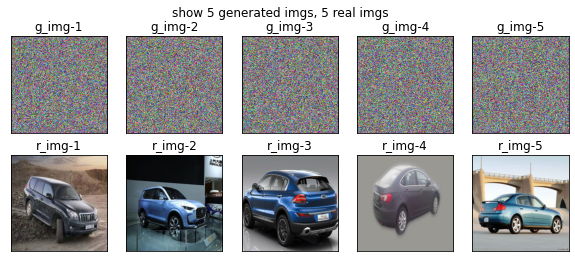

------------------------------------------------------------------------------------------ Discriminator result ------------------------------------------------------------------------------------------
Epoch:1 | batch:1 | loss_D:-0.0829 
 ------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------ Discriminator result ------------------------------------------------------------------------------------------
Epoch:1 | batch:2 | loss_D:-0.1993 
 ------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------ Discriminator result ------------------------------------------------------------------------------------------
Epoch:1 | batch:3 | loss_D:-0.3142 
 ------------------------------------------------------------------------------------------
-------

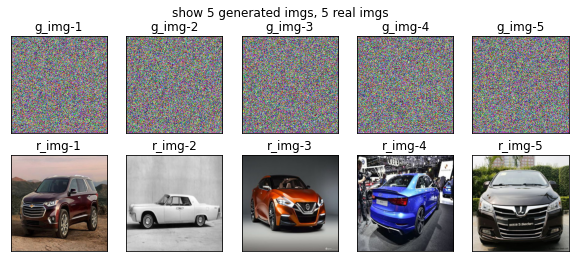

------------------------------------------------------------------------------------------ Discriminator result ------------------------------------------------------------------------------------------
Epoch:1 | batch:6 | loss_D:-0.6389 
 ------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------ Discriminator result ------------------------------------------------------------------------------------------
Epoch:1 | batch:7 | loss_D:-0.8111 
 ------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------ Discriminator result ------------------------------------------------------------------------------------------
Epoch:1 | batch:8 | loss_D:-1.0157 
 ------------------------------------------------------------------------------------------
-------

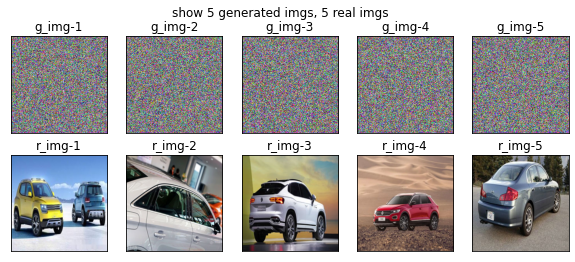

------------------------------------------------------------------------------------------ Discriminator result ------------------------------------------------------------------------------------------
Epoch:1 | batch:11 | loss_D:-1.6485 
 ------------------------------------------------------------------------------------------


KeyboardInterrupt: ignored

In [32]:
# training loop for GAN
EPOCH = 10
CRITIC = 5
plt.ion()

for epoch in range(EPOCH):
  for batch, (r_img, _) in enumerate(train_loader):
    g_input = torch.rand(size=(_.size(0), 100)) # (batch_size, 100)
    # Discriminator forward
    f_img = Variable(generator(g_input)) # (batch_size, 3, 200, 200)
    r_img = Variable(r_img)
    # r_logit = discriminator(r_img.detach()) # (batch_size, 50*50)
    # f_logit = discriminator(f_img.detach()) # (batch_size, 50*50)

    # Discriminator backward
    # r_label = torch.ones(size=(r_logit.shape))
    # f_label = torch.zeros(size=(f_logit.shape))
    # loss_real = loss_func(r_logit, r_label) # BCELoss: real-feature-map v.s. ones_label
    # loss_fake = loss_func(f_logit, f_label) # BCELoss: fake-feature-map v.s. zeros_label
    # loss_discriminator = (loss_real + loss_fake) / 2
    loss_discriminator = -torch.mean(discriminator(r_img)) + torch.mean(discriminator(f_img)) # W-GAN

    # discriminator step
    discriminator_optimizer.zero_grad()
    loss_discriminator.backward()
    discriminator_optimizer.step()

    # discriminator training process
    # if batch % 5 == 0:
    print("---"*30, "Discriminator result", "---"*30)
    print("Epoch:%i | batch:%i | loss_D:%.4f"%(epoch+1, batch, loss_discriminator), "\n", "---"*30)

    # Generator, each 5 batches, train generator for one time.
    if batch % CRITIC == 0:
      discriminator.eval()
      generator.train()

      # Generator forward
      g_input = Variable(torch.rand(size=(_.size(0), 100)))
      g_img = generator(g_input)
      # g_logit = discriminator(g_img)

      # Generator backward
      # r_label = torch.ones(size=(r_logit.shape))
      # loss_generator = loss_func(g_logit, r_label)
      loss_generator = -torch.mean(discriminator(g_img))

      # Generator step
      generator_optimizer.zero_grad()
      loss_generator.backward()
      generator_optimizer.step()

      # Generator result
      print("---"*30 ,"Generator result", "---"*30)
      print("Epoch:%i | batch:%i | loss_G:%.4f"%(epoch+1, batch, loss_generator), "\n", "---"*30)
      fig, ax = plt.subplots(2, 5, figsize=(10,4))
      for i in range(2):
        for j in range(5):
          ax[i][j].set_xticks([])
          ax[i][j].set_yticks([])
          if i == 0:
            ax[i][j].imshow(unloader(g_img[j]))
            ax[i][j].set_title("g_img-%i"%(j+1))
          else:
            ax[i][j].imshow(unloader(r_img[j]))
            ax[i][j].set_title("r_img-%i"%(j+1))
      fig.suptitle("show 5 generated imgs, 5 real imgs")
      plt.draw()
      plt.pause(0.5)


  print("==="*30, "To Next Epoch", "==="*30)

plt.ioff()
plt.show()

# GAN 真的訓練不起來, 不知道如何？？

In [ ]:
# # 練習畫子圖
# fig, ax = plt.subplots(2, 5, figsize=(10,4), )
# index=0
# for i in range(2):
#   for j in range(5):
#     # ax[i][j].plot(np.linspace(0,1,10), np.random.randn(10))
#     ax[i][j].imshow(unloader(train_tensor[index]))
#     ax[i][j].set_xticks([])
#     ax[i][j].set_yticks([])
#     ax[i][j].set_title("%i img"%(j+1))
#     index+=1
# fig.suptitle("show 5 generated imgs & 5 real img", fontsize=16)
# # for i in range(5):
# #   ax[0][i].imshow(unloader(train_tensor[i]))
# #   ax[0][i].set_xticks([])
# #   ax[0][i].set_yticks([])
# #   fig.title("show 5 generated imgs")

In [ ]:
# torch.save(cnn_classifier.state_dict(), "car-cnn.pkl")
torch.save(generator.state_dict(), "car-generator.pkl")
torch.save(discriminator.state_dict(), "car-discriminator.pkl")
# restore_net = torch.load("car-cnn.pkl")
# cnn_autoencorder = restore_net